<img src="https://raw.githubusercontent.com/DHI/mikeio/main/images/logo/PNG/MIKE-IO-Logo-Pos-RGB-nomargin.png" alt="image" width="500">

# Example 1 - Read, write and manipulate dfs0, dfs1, dfs2, dfs3, dfsu and mesh files.

In [1]:
# import mikeio

import mikeio

#### Dfs0 files

In [2]:
# Open a dfs0 file

ds = mikeio.read("data/100year_rainfall.dfs0")

<Axes: >

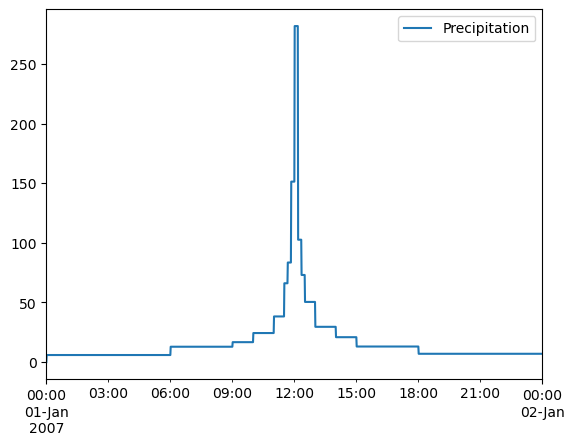

In [3]:
# Plot the dataset

ds.plot()

In [4]:
# Convert to a Pandas DataFrame

ds.to_pandas().to_frame().head()

,Precipitation
2007-01-01 00:00:00,0.000000
2007-01-01 00:01:00,5.913869
2007-01-01 00:02:00,5.913869
2007-01-01 00:03:00,5.913869
2007-01-01 00:04:00,5.913869


<Axes: >

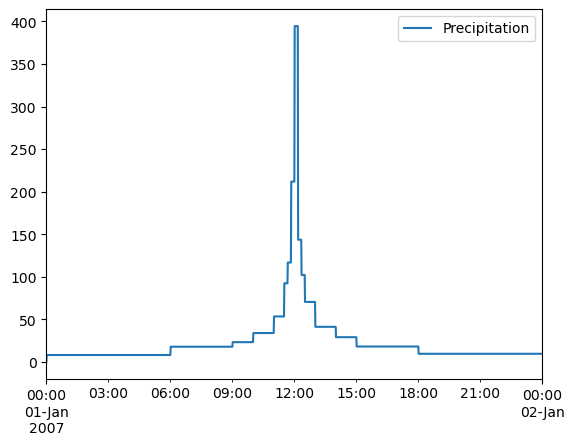

In [5]:
# Modify the dataset

ds_new = ds * 1.4
ds_new.plot()

In [6]:
# Save the updated dataset back dfs0

ds_new.to_dfs("100_year_with_CF.dfs0")

#### Dfsu files

In [7]:
# Open a dfsu file

ds = mikeio.read("data/blue_beach.dfsu")
ds

<mikeio.Dataset>
dims: (time:121, element:20956)
time: 2024-01-01 12:00:00 - 2024-01-01 14:00:00 (121 records)
geometry: Dfsu2D (20956 elements, 10832 nodes)
items:
  0:  Total water depth <Water Depth> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  P flux <Flow Flux> (meter pow 3 per sec per meter)
  4:  Q flux <Flow Flux> (meter pow 3 per sec per meter)

In [8]:
# Select a dataset

da = ds["Total water depth"]
da

<mikeio.DataArray>
name: Total water depth
dims: (time:121, element:20956)
time: 2024-01-01 12:00:00 - 2024-01-01 14:00:00 (121 records)
geometry: Dfsu2D (20956 elements, 10832 nodes)

In [9]:
# Calculate max water depth

da_max = da.nanmax()
da_max

<mikeio.DataArray>
name: Total water depth
dims: (element:20956)
time: 2024-01-01 12:00:00 (time-invariant)
geometry: Dfsu2D (20956 elements, 10832 nodes)
values: [0.03396, 0.002369, ..., 0.002483]

<Axes: title={'center': '2024-01-01 12:00:00'}, xlabel='Easting [m]', ylabel='Northing [m]'>

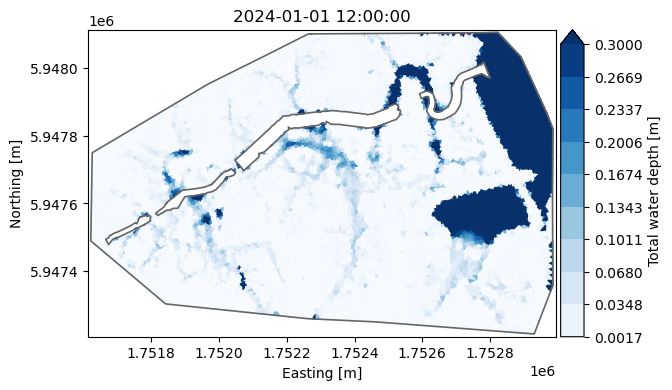

In [10]:
# Plot the maximum water depth

# da_max.plot()
# da_max.plot(vmax=0.3)
da_max.plot(vmax=0.3, cmap="Blues")

#### Mesh files

<Axes: title={'center': 'Mesh'}, xlabel='Easting [m]', ylabel='Northing [m]'>

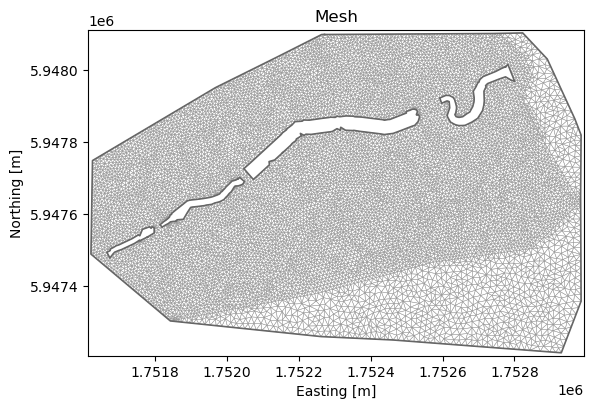

In [11]:
# Plot just the mesh

da_max.geometry.plot.mesh()

In [12]:
# Save the mesh

da_max.geometry.to_mesh("my_mesh.mesh")

#### Dfs2 files

In [13]:
# Make a grid with the same extent as the mesh

grid = da_max.geometry.get_overset_grid(dx=1)
grid

<mikeio.Grid2D>
x: [1.752e+06, 1.752e+06, ..., 1.753e+06] (nx=1364, dx=1)
y: [5.947e+06, 5.947e+06, ..., 5.948e+06] (ny=890, dy=1)
projection: PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",GEOGCS["NZGD2000",DATUM["New_Zealand_Geodetic_Datum_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6167"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4167"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",173],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1600000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","2193"]]

In [14]:
# Interpret the max water level onto the grid

da_max_grid = da_max.interp_like(grid)
da_max_grid

<mikeio.DataArray>
name: Total water depth
dims: (y:890, x:1364)
time: 2024-01-01 12:00:00 (time-invariant)
geometry: Grid2D (ny=890, nx=1364)

<Axes: xlabel='Easting [m]', ylabel='Northing [m]'>

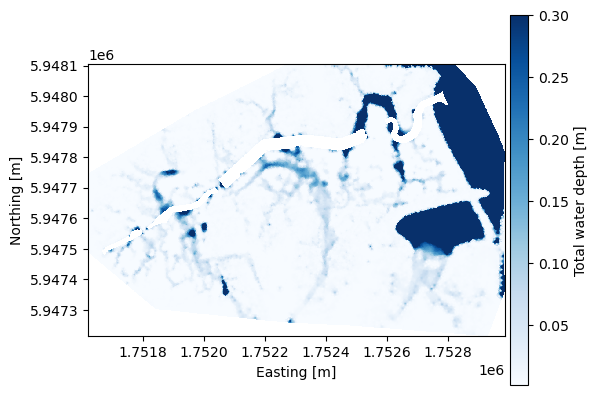

In [15]:
# Plot the gridded max water depth

da_max_grid.plot(vmax=0.3, cmap="Blues")

In [16]:
# Save to Dfs2

da_max_grid.to_dfs("max_water_depth.dfs2")

In [17]:
# Save to GeoTIFF

import rioxarray
da_max_grid.to_xarray().rio.to_raster("max_water_depth.tiff")